<a href="https://colab.research.google.com/github/VardhanVelamakanni/Brain-Tumor-Prediction-Custom/blob/main/braintumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [7]:
from google.colab import files
import zipfile
import os

# Upload the ZIP file
uploaded = files.upload()

# Get the uploaded zip filename (usually the only file in uploaded)
zip_filename = list(uploaded.keys())[0]

# Create a directory for your dataset
os.makedirs('/content/dataset', exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# List all files in the dataset folder
for root, dirs, files in os.walk('/content/dataset'):
    for file in files:
        print(os.path.join(root, file))

# Remove the original ZIP file (optional)
os.remove(zip_filename)

Saving archive (1).zip to archive (1).zip
/content/dataset/Training/glioma_tumor/gg (822).jpg
/content/dataset/Training/glioma_tumor/gg (431).jpg
/content/dataset/Training/glioma_tumor/gg (30).jpg
/content/dataset/Training/glioma_tumor/gg (660).jpg
/content/dataset/Training/glioma_tumor/gg (130).jpg
/content/dataset/Training/glioma_tumor/gg (289).jpg
/content/dataset/Training/glioma_tumor/gg (388).jpg
/content/dataset/Training/glioma_tumor/gg (286).jpg
/content/dataset/Training/glioma_tumor/gg (51).jpg
/content/dataset/Training/glioma_tumor/gg (674).jpg
/content/dataset/Training/glioma_tumor/gg (144).jpg
/content/dataset/Training/glioma_tumor/gg (723).jpg
/content/dataset/Training/glioma_tumor/gg (703).jpg
/content/dataset/Training/glioma_tumor/gg (788).jpg
/content/dataset/Training/glioma_tumor/gg (150).jpg
/content/dataset/Training/glioma_tumor/gg (738).jpg
/content/dataset/Training/glioma_tumor/gg (182).jpg
/content/dataset/Training/glioma_tumor/gg (238).jpg
/content/dataset/Trainin

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [9]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [10]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../content/dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('../content/dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [11]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [13]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 566s 7s/step - accuracy: 0.2784 - loss: 2.5975 - val_accuracy: 0.2721 - val_loss: 1.3596
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 566s 7s/step - accuracy: 0.3824 - loss: 1.2889 - val_accuracy: 0.5612 - val_loss: 1.0362
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 618s 7s/step - accuracy: 0.5768 - loss: 1.0175 - val_accuracy: 0.6088 - val_loss: 0.9093
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 550s 7s/step - accuracy: 0.6346 - loss: 0.8496 - val_accuracy: 0.6769 - val_loss: 0.7753
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 551s 7s/step - accuracy: 0.7033 - loss: 0.7398 - val_accuracy: 0.6837 - val_loss: 0.7427
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 568s 7s/step - accuracy: 0.7140 - loss: 0.6881 - val_accuracy: 0.7279 - val_loss: 0.6193
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 541s 7s/step - accuracy: 0.7669 - loss: 0.5629 - val_accuracy: 0.7415 - val_loss: 0.6272
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 571s 7s/step - accuracy: 0.8225 - loss: 0.4680 - val_accuracy: 0.7245 - v

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

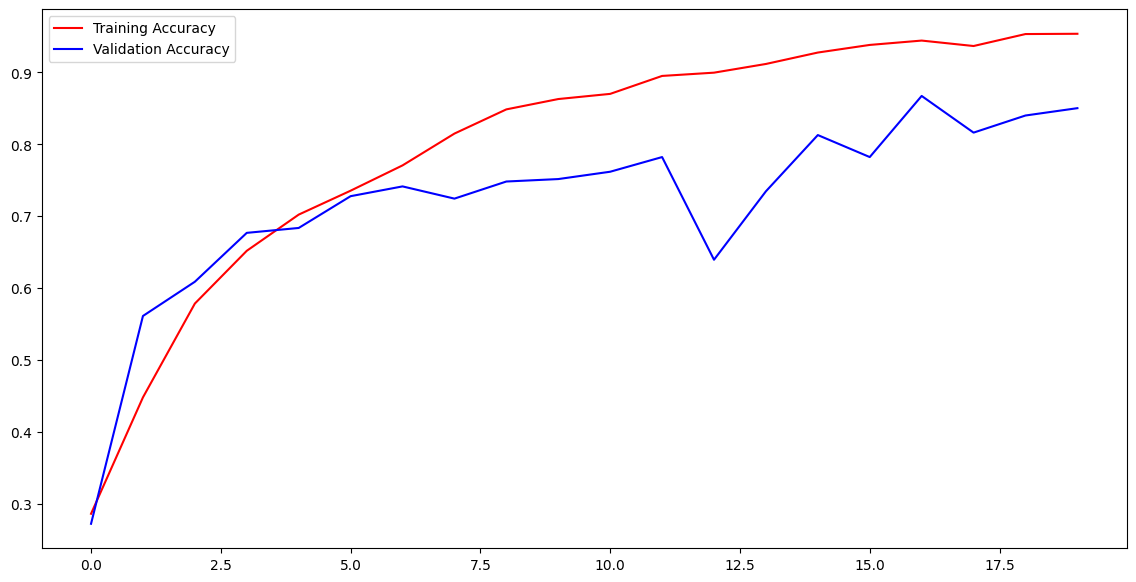

In [18]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

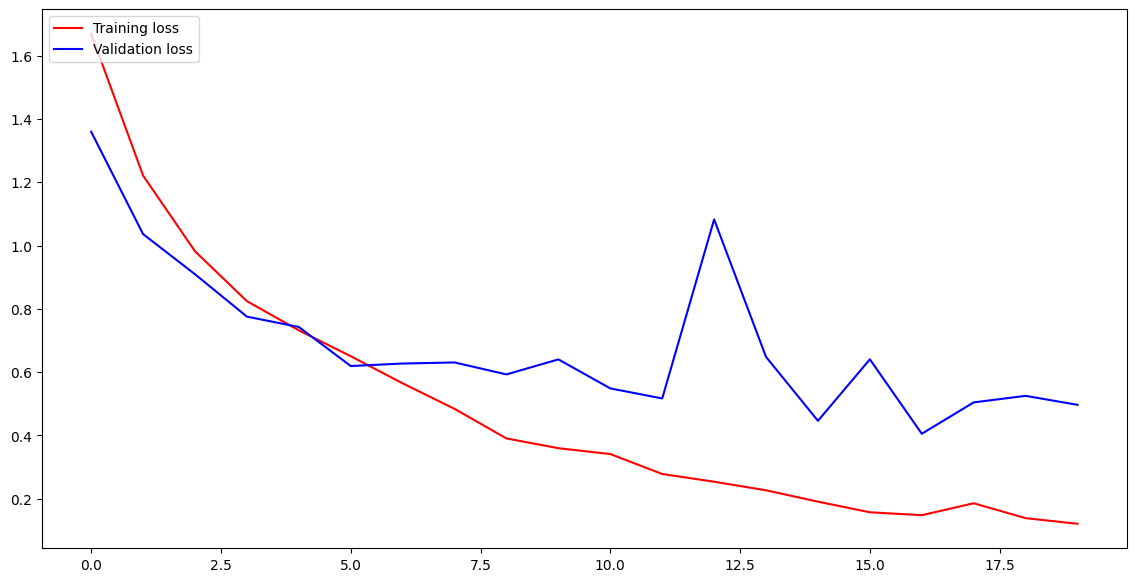

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [69]:
img = cv2.imread('../content/dataset/Testing/meningioma_tumor/image(1).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [70]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

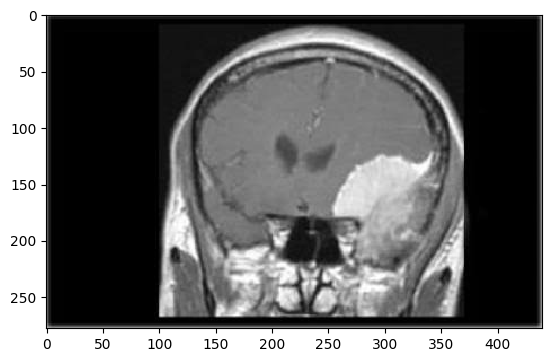

In [71]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../content/dataset/Testing/meningioma_tumor/image(1).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [72]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


np.int64(1)

In [73]:
class_names = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
a=model.predict(img_array)
index = a.argmax()
tumor_name = class_names[index]
print(f"Predicted tumor: {tumor_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted tumor: Meningioma


In [25]:
from sklearn.metrics import f1_score
# After prediction
y_pred = model.predict(X_test).argmax(axis=1)  # Predicted classes
y_true = y_test.argmax(axis=1)  # True classes (assuming one-hot encoded)
f1 = f1_score(y_true, y_pred, average='weighted')  # 'weighted' for multi-class
print(f"F1 Score: {f1:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step
F1 Score: 0.8255


11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step


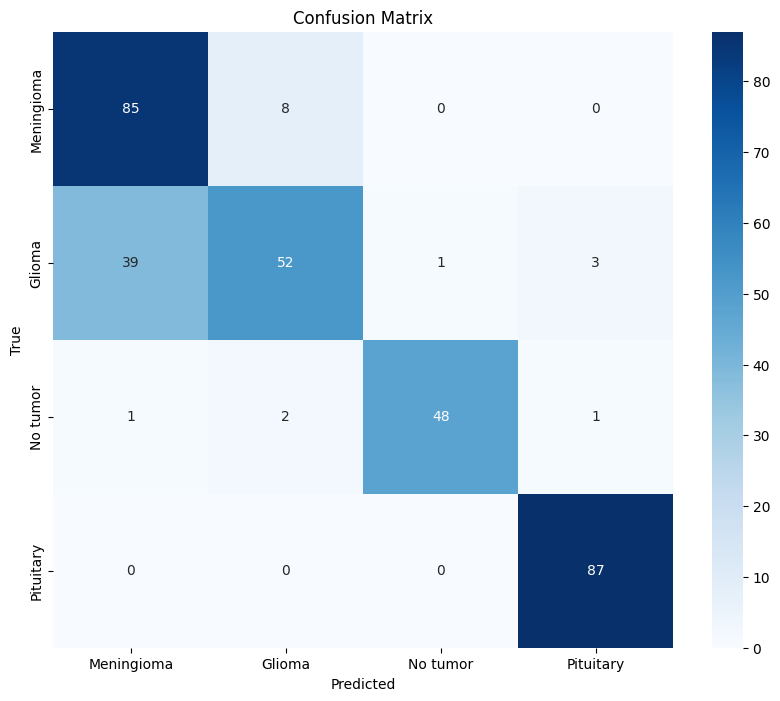

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error

y_pred_proba = model.predict(X_test)
y_true = y_test  # One-hot encoded
mae = mean_absolute_error(y_true, y_pred_proba)
print(f"Mean Absolute Error: {mae:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Mean Absolute Error: 0.0898


In [28]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
print(classification_report(y_true, y_pred, target_names=class_names))

11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step
              precision    recall  f1-score   support

  Meningioma       0.68      0.91      0.78        93
      Glioma       0.84      0.55      0.66        95
    No tumor       0.98      0.92      0.95        52
   Pituitary       0.96      1.00      0.98        87

    accuracy                           0.83       327
   macro avg       0.86      0.85      0.84       327
weighted avg       0.85      0.83      0.83       327



In [29]:
from sklearn.metrics import roc_auc_score
import numpy as np

y_pred_proba = model.predict(X_test)  # Probability scores
y_true = y_test  # One-hot encoded true labels
auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')  # 'ovr' = one-vs-rest
print(f"AUC-ROC Score: {auc:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
AUC-ROC Score: 0.9652


In [30]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)
tn = cm[0,0]  # True negatives (assuming class 0 is negative)
fp = cm[0,1]  # False positives
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Specificity: 0.9140


In [31]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_true, y_pred))


0.7721947079760352


In [32]:
from sklearn.metrics import log_loss
print(log_loss(y_true, y_pred_proba))


0.5894222380921028


In [33]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_true, y_pred))


0.782872420091603


11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


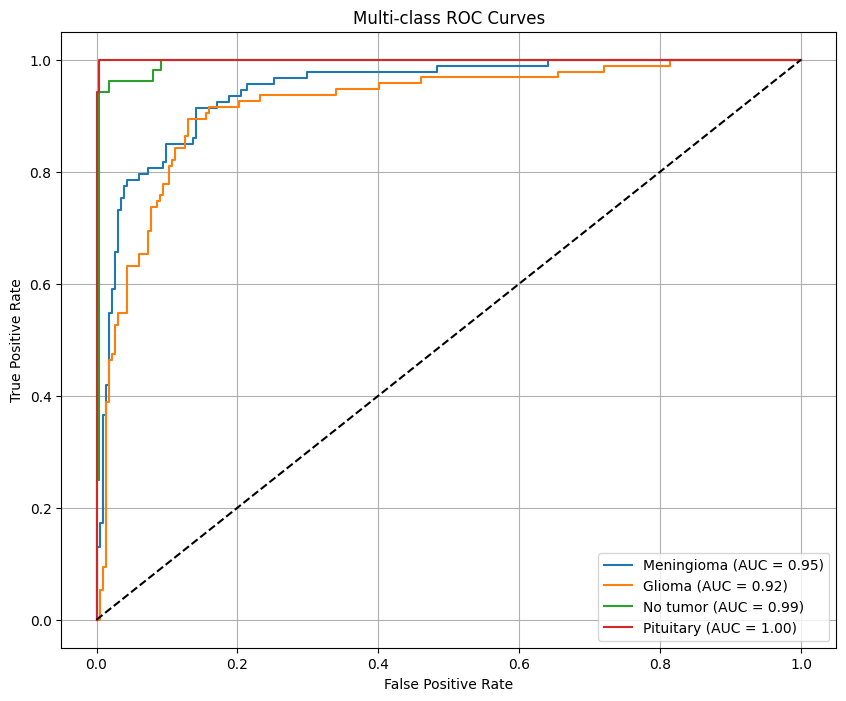

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_test_bin = y_test
y_pred_prob = model.predict(X_test)
n_classes = y_test.shape[1]

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()


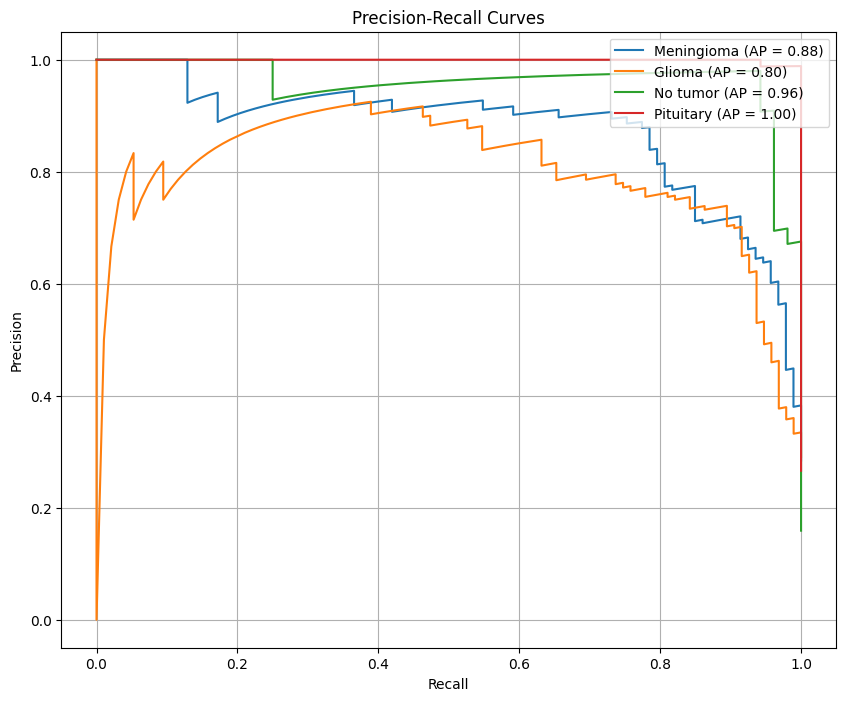

In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = {}
recall = {}
avg_precision = {}

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall[i], precision[i], label=f'{class_names[i]} (AP = {avg_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.grid()
plt.show()


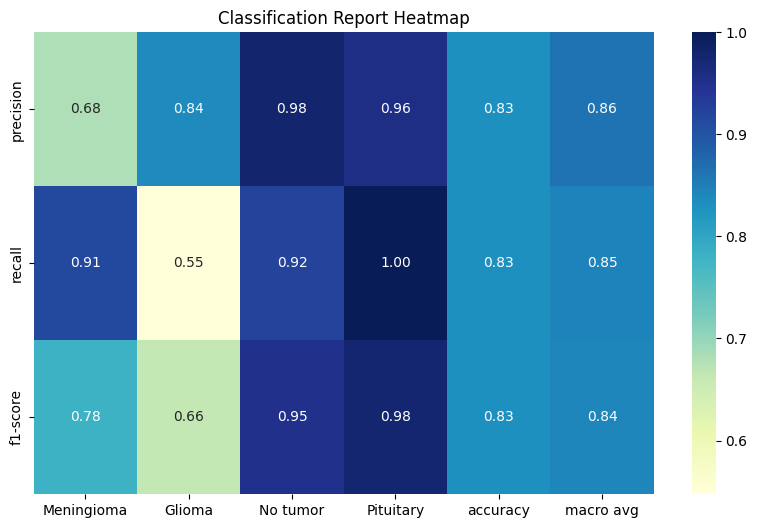

In [37]:
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df = pd.DataFrame(report_dict).iloc[:-1, :-1]  # exclude support/accuracy row/column

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


In [80]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load model once globally (not inside the function)
model = load_model('braintumor.h5')

# Class names in training order
class_names = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']

def predict_tumor_type(image_path):
    """
    Predicts the brain tumor type from an MRI image.

    Args:
        image_path (str): Path to the MRI image.

    Returns:
        str: Predicted tumor name.
    """

    try:
        # Read and preprocess the image
        img = cv2.imread(image_path)
        img = cv2.resize(img, (150, 150))
        img_array = np.array(img).reshape(1, 150, 150, 3)

        # Predict
        prediction = model.predict(img_array)
        predicted_index = prediction.argmax()
        tumor_name = class_names[predicted_index]

        # Show the image with prediction (optional for Flask, but useful for debugging)
        img_disp = image.load_img(image_path)
        plt.imshow(img_disp)
        plt.axis('off')
        plt.title(f"Prediction: {tumor_name}")
        plt.show()

        return tumor_name

    except Exception as e:
        print(f"Error: {e}")
        return "Prediction Failed"


Saving image(86).jpg to image(86).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


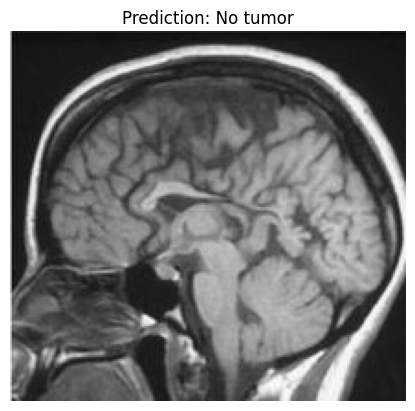

Predicted Tumor Type: No tumor


In [83]:
from google.colab import files

# Upload an image manually
uploaded = files.upload()

# Get the path of uploaded image
image_path = list(uploaded.keys())[0]

# Run prediction
result = predict_tumor_type(image_path)
print(f"Predicted Tumor Type: {result}")
